## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 11RcxQ8XgP5UKZLXJ9uq7LBHWlEB6BNPH

Downloading...
From: https://drive.google.com/uc?id=11RcxQ8XgP5UKZLXJ9uq7LBHWlEB6BNPH
To: /content/all_sites_scores.csv
100% 7.43k/7.43k [00:00<00:00, 22.7MB/s]


In [3]:
!gdown 1T0IDA_OzSe8cSsdVRAzVka2jE0om7kaR

Downloading...
From: https://drive.google.com/uc?id=1T0IDA_OzSe8cSsdVRAzVka2jE0om7kaR
To: /content/fandango_scrape.csv
100% 18.9k/18.9k [00:00<00:00, 48.3MB/s]


In [4]:
df_f = pd.read_csv('fandango_scrape.csv')

In [5]:
df_a = pd.read_csv('all_sites_scores.csv')

In [6]:
df_f

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [7]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
df_f.isnull().sum()

FILM      0
STARS     0
RATING    0
VOTES     0
dtype: int64

<Axes: xlabel='STARS', ylabel='RATING'>

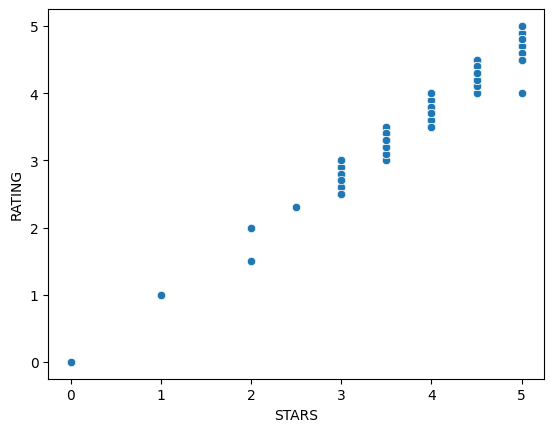

In [9]:
sns.scatterplot(x='STARS',y='RATING',data=df_f)

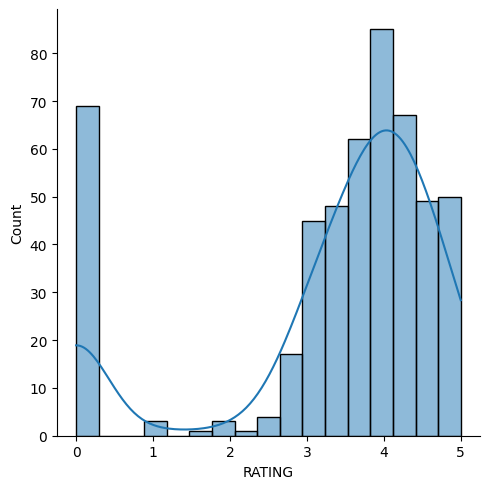

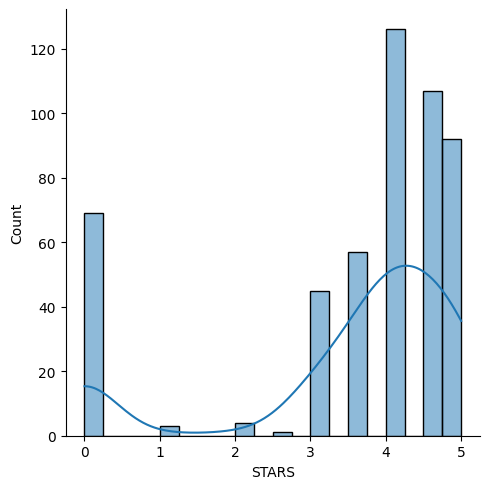

In [10]:
sns.displot(df_f['RATING'],kde=True)
sns.displot(df_f['STARS'],kde=True)

* There are some places where Ratings and Stars are not matching
* This could be because they are rouonding off the rating value.

In [14]:
df_f['Difference'] = np.abs(df_f['STARS']-df_f['RATING'])

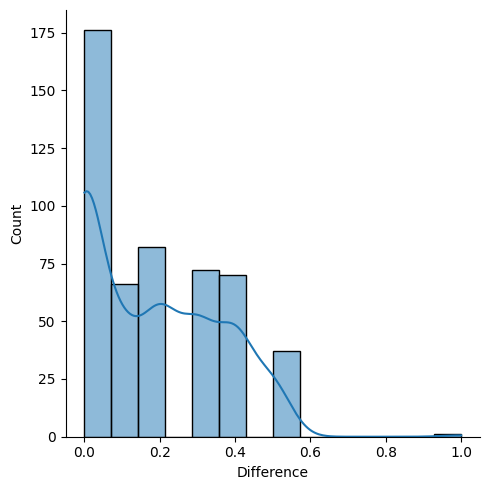

In [15]:
sns.displot(df_f['Difference'],kde=True)

(0.5, 1.05)

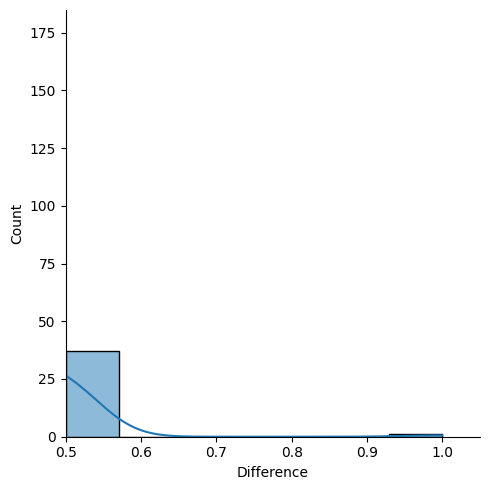

In [16]:
sns.displot(df_f['Difference'],kde=True)
plt.xlim(0.5,)

(0.0, 2.0)

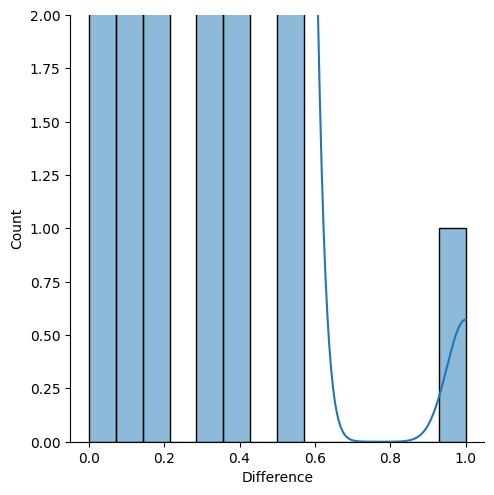

In [17]:
sns.displot(df_f['Difference'],kde=True)
plt.ylim(0,2)

In [18]:
df_f['Difference'].describe()

count    504.000000
mean       0.182738
std        0.172917
min        0.000000
25%        0.000000
50%        0.200000
75%        0.300000
max        1.000000
Name: Difference, dtype: float64

In [19]:
len(df_f[df_f['Difference']>0.4])

82

* We can see that there is an mean difference of 1.8 stars between actual rating and starts displayed
* This could be because they are rounding off the actual value and showing in the website
ex: if the original rating is 4.3 they could be showing 4.5
* This is not too bad
* But we can see that 82 instances the ratings have a difference of more than 0.4 stars and there is an instance where the difference is 1 star which is a lot, therefore we can assume that fandango is not showing its ratings properly

In [22]:
df_a

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [23]:
df = pd.merge(df_f,df_a,on='FILM',how='inner')

In [24]:
df

,FILM,STARS,RATING,VOTES,Difference,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252
...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0,87,63,68,6.4,6.7,19,5289
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,0.4,95,81,87,6.3,7.0,18,1107
142,The Wrecking Crew (2015),4.5,4.2,38,0.3,93,84,67,7.0,7.8,4,732
143,Tangerine (2015),4.0,3.9,36,0.1,95,86,86,7.3,7.4,14,696


In [25]:
df['Year'] = df['FILM'].apply(lambda x:x[-5:-1])

# df['FILM'][1][-5:-1]

<Axes: xlabel='Year', ylabel='count'>

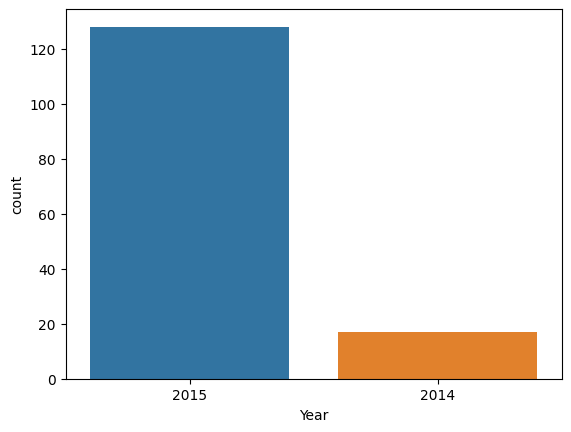

In [26]:
sns.countplot(x='Year',data=df)

In [27]:
df['RottenTomatoes'].describe()

count    145.000000
mean      60.634483
std       30.161098
min        5.000000
25%       31.000000
50%       63.000000
75%       89.000000
max      100.000000
Name: RottenTomatoes, dtype: float64

* Normalizing all the scores to range(0,5) for easier analysis

In [28]:
n=[]
df['RottenTomatoes_N'] = df['RottenTomatoes']/20
n.append('RottenTomatoes_N')

In [29]:
df['RottenTomatoes_User'].describe()

count    145.000000
mean      63.696552
std       19.974749
min       20.000000
25%       50.000000
50%       66.000000
75%       81.000000
max       94.000000
Name: RottenTomatoes_User, dtype: float64

In [30]:
df['RottenTomatoes_User_N'] = df['RottenTomatoes_User']/20
n.append('RottenTomatoes_User_N')

In [31]:
df['Metacritic'].describe()

count    145.000000
mean      58.696552
std       19.538183
min       13.000000
25%       43.000000
50%       59.000000
75%       75.000000
max       94.000000
Name: Metacritic, dtype: float64

In [32]:
df['Metacritic_N'] = df['Metacritic']/20
n.append('Metacritic_N')

In [33]:
df['Metacritic_User'].describe()

count    145.000000
mean       6.508966
std        1.510883
min        2.400000
25%        5.700000
50%        6.800000
75%        7.500000
max        9.600000
Name: Metacritic_User, dtype: float64

In [34]:
df['Metacritic_User_N'] = df['Metacritic_User']/2
n.append('Metacritic_User_N')

In [35]:
df['IMDB'].describe()

count    145.000000
mean       6.729655
std        0.957944
min        4.000000
25%        6.300000
50%        6.900000
75%        7.400000
max        8.600000
Name: IMDB, dtype: float64

In [36]:
df['IMDB_N'] = df['IMDB']/2
n.append('IMDB_N')

In [37]:
n.extend(['STARS','RATING','FILM'])

In [38]:
n

['RottenTomatoes_N',
 'RottenTomatoes_User_N',
 'Metacritic_N',
 'Metacritic_User_N',
 'IMDB_N',
 'STARS',
 'RATING',
 'FILM']

In [39]:
normalized_df = df[n]

In [40]:
normalized_df

,RottenTomatoes_N,RottenTomatoes_User_N,Metacritic_N,Metacritic_User_N,IMDB_N,STARS,RATING,FILM
0,1.25,2.10,2.30,1.60,2.10,4.0,3.9,Fifty Shades of Grey (2015)
1,3.55,4.05,2.95,3.50,3.65,4.5,4.5,Jurassic World (2015)
2,3.60,4.25,3.60,3.30,3.70,5.0,4.8,American Sniper (2015)
3,4.05,4.20,3.35,3.40,3.70,5.0,4.8,Furious 7 (2015)
4,4.90,4.50,4.70,4.45,4.30,4.5,4.5,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,4.35,3.15,3.40,3.20,3.35,3.5,3.5,"Kumiko, The Treasure Hunter (2015)"
141,4.75,4.05,4.35,3.15,3.50,4.0,3.6,The Diary of a Teenage Girl (2015)
142,4.65,4.20,3.35,3.50,3.90,4.5,4.2,The Wrecking Crew (2015)
143,4.75,4.30,4.30,3.65,3.70,4.0,3.9,Tangerine (2015)


<Axes: ylabel='Density'>

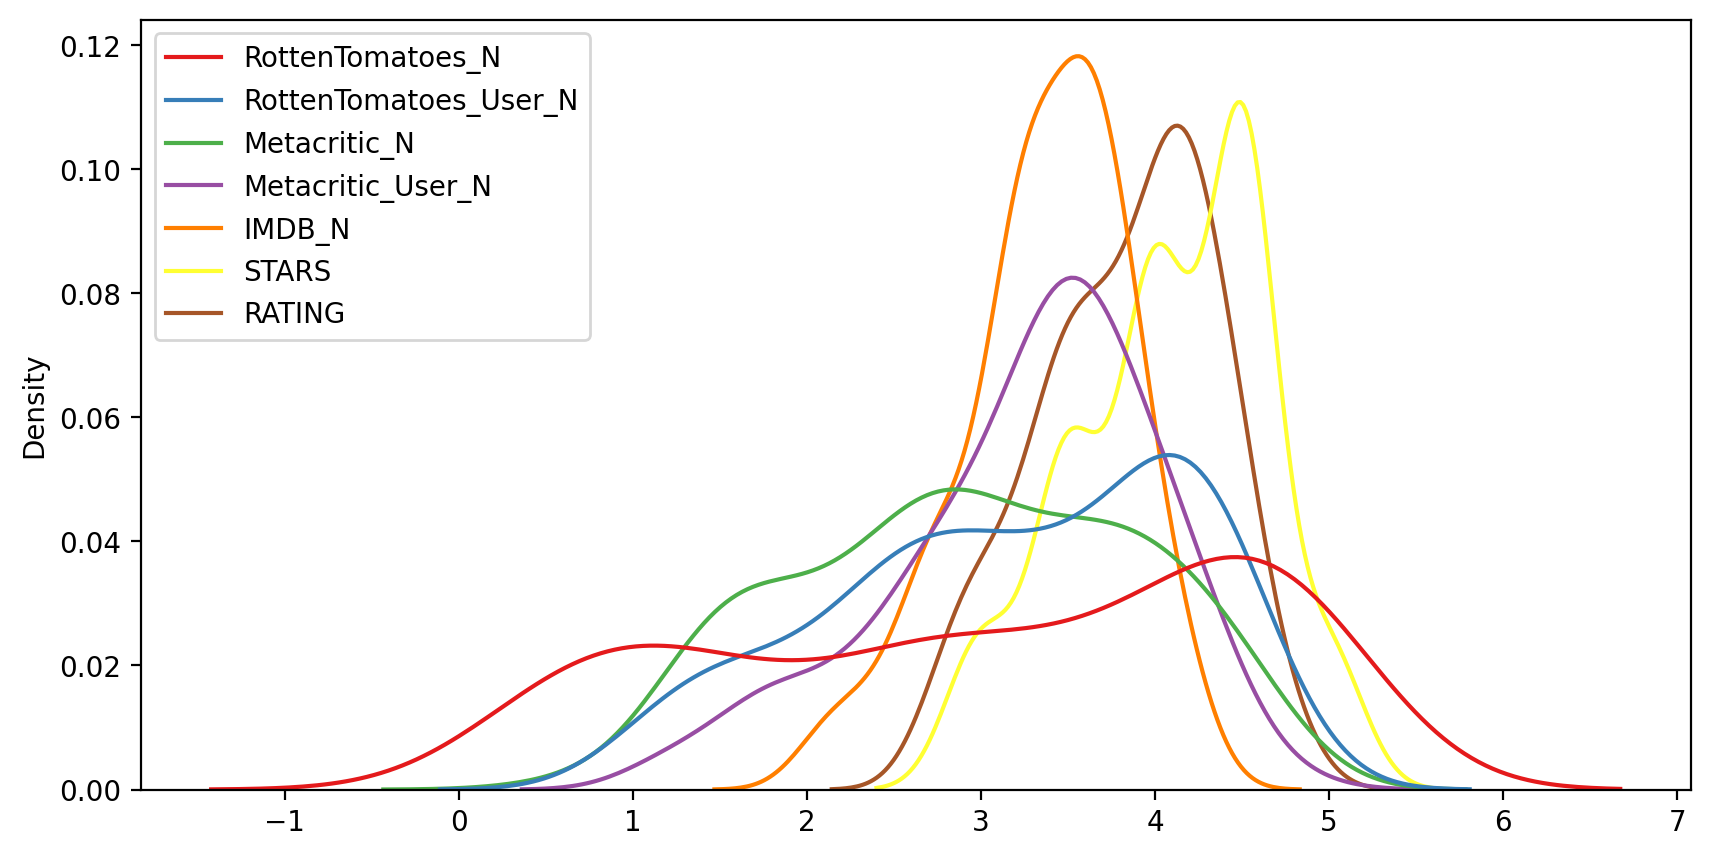

In [41]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(normalized_df.drop('FILM',axis=1),palette='Set1')

In [45]:
high_rated = normalized_df.nlargest(10,'RottenTomatoes_N')

<Axes: ylabel='Density'>

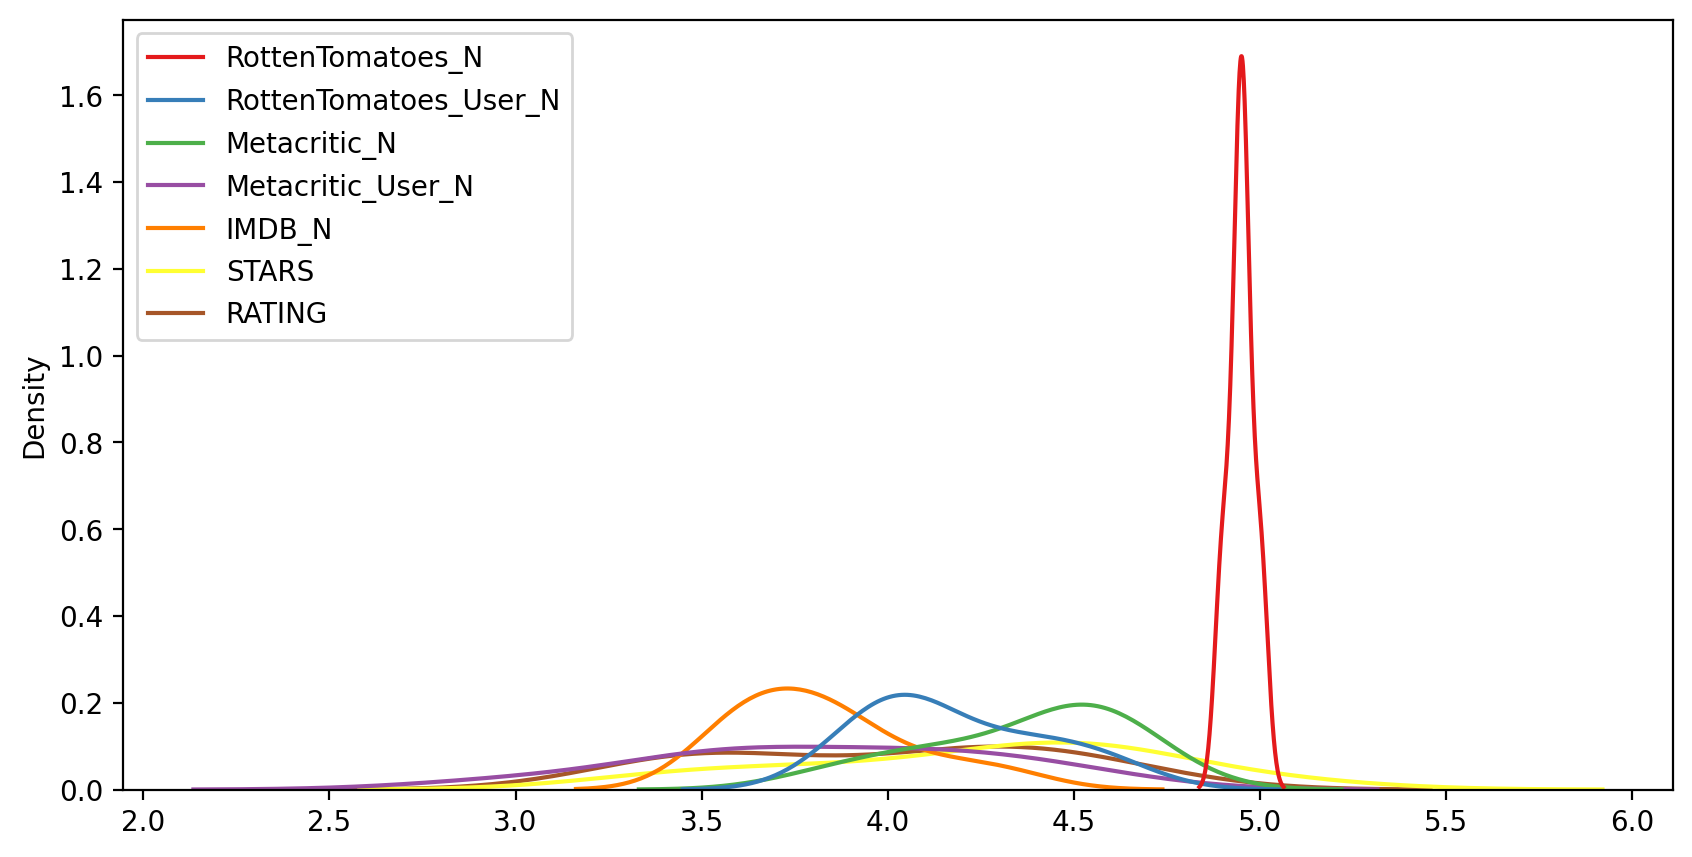

In [46]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(high_rated.drop('FILM',axis=1),palette='Set1')

In [43]:
low_rated = normalized_df.nsmallest(10,'RottenTomatoes_N')

<Axes: ylabel='Density'>

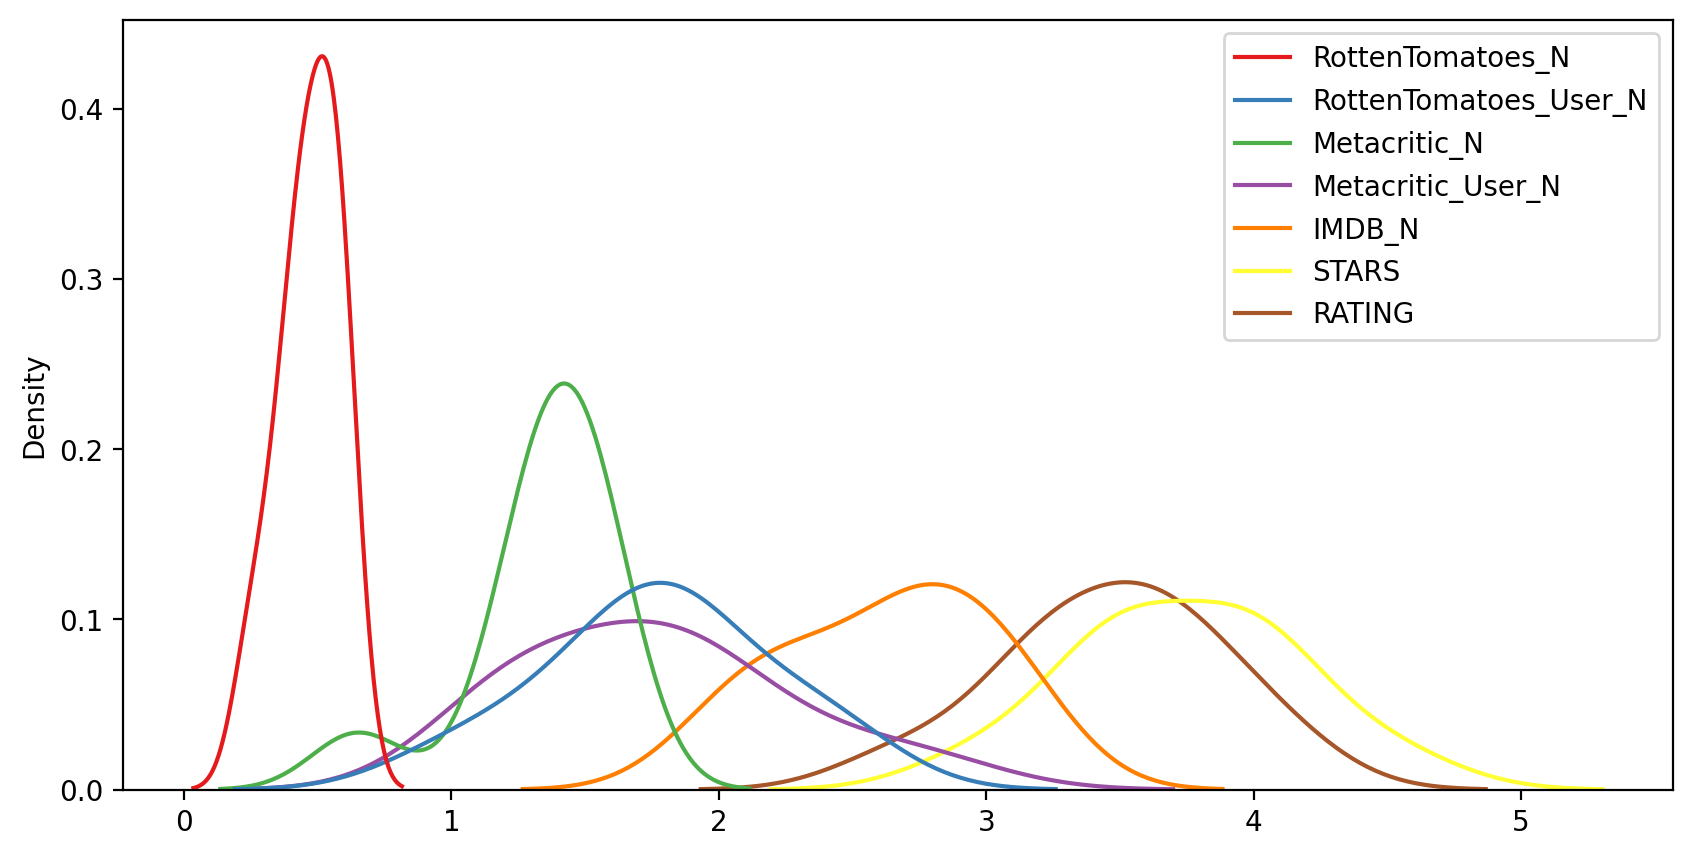

In [44]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(low_rated.drop('FILM',axis=1),palette='Set1')

In [48]:
low_rated['diff'] = np.abs(low_rated['RottenTomatoes_N']-low_rated['STARS'])

In [49]:
low_rated

,RottenTomatoes_N,RottenTomatoes_User_N,Metacritic_N,Metacritic_User_N,IMDB_N,STARS,RATING,FILM,diff
49,0.25,1.80,0.65,1.20,2.15,3.5,3.5,Paul Blart: Mall Cop 2 (2015),3.25
84,0.35,2.45,1.40,1.65,2.95,4.0,3.9,Hitman: Agent 47 (2015),3.65
54,0.40,1.85,1.55,1.85,2.45,4.0,3.7,Hot Pursuit (2015),3.60
25,0.45,2.30,1.30,2.30,3.05,4.5,4.1,Taken 3 (2015),4.05
28,0.45,1.00,1.35,1.25,2.00,3.0,2.7,Fantastic Four (2015),2.55
50,0.50,1.75,1.50,2.75,2.30,4.0,3.6,The Boy Next Door (2015),3.50
87,0.55,1.35,1.60,1.90,2.70,3.5,3.2,Unfinished Business (2015),2.95
88,0.55,2.00,1.20,1.20,3.15,4.0,3.6,The Loft (2015),3.45
77,0.60,1.75,1.50,1.95,2.75,3.5,3.2,Seventh Son (2015),2.90
78,0.60,1.50,1.35,1.60,2.75,3.5,3.2,Mortdecai (2015),2.90


In [51]:
low_rated[low_rated['diff']==low_rated['diff'].max()]

,RottenTomatoes_N,RottenTomatoes_User_N,Metacritic_N,Metacritic_User_N,IMDB_N,STARS,RATING,FILM,diff
25,0.45,2.3,1.3,2.3,3.05,4.5,4.1,Taken 3 (2015),4.05


* In the above plot we can see that for the 10 lowest rated movies in rottentomatoes by users the ratings,stars in fandango are highest among other websites
* the values are ranging from arouond 2-5 with most of them in range (3,4)
* the movie with the highest difference in ratings is <b>'Taken 3 (2015)'</b> with the rating difference of 4.05

* Thus we can conclude that fandango is displaying false ratings in its website in order to sell more tickets